## 25W-COM SCI-M148 Project 2 - Binary Classification Comparative Methods

Name:

UID:

### **Submission Guidelines**
1. Please fill in your name and UID above.

2. Please submit a **PDF printout** of your Jupyter Notebook to **Gradescope**. If you have any trouble accessing Gradescope, please let a TA know ASAP.  

3. As the PDF can get long, please tag the respective sections to ensure the readers know where to look.  

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results.

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance.

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset

For this exercise, we will be using a subset of the <b>UCI Heart Disease dataset</b>. This dataset was created by collecting clinical data from patients undergoing diagnostic tests for heart disease. All identifying information about the patients has been removed to protect their privacy. The dataset represents data from patients who were suspected of having heart disease and underwent several diagnostic tests, including blood tests, electrocardiograms (ECG), exercise stress tests, and fluoroscopic imaging. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Patient age in years</li>
    <li><b>sex:</b> Patient sex (1 = male; 0 = female)</li>
    <li><b>c_pain:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina (unusual discomfort due to reduced blood flow to the heart); 2 = non-anginal pain (chest pain unrelated to the heart); 3 = typical angina (classic chest discomfort due to reduced blood flow to the heart))</li>
    <li><b>rbp:</b> Resting blood pressure in mm Hg (measured at hospital admission)</li>
    <li><b>chol:</b> Serum cholesterol level in mg/dL</li>
    <li><b>high_fbs:</b> Fasting blood sugar > 120 mg/dL (1 = true; 0 = false)</li>
    <li><b>r_ecg:</b> Resting electrocardiographic results (0 = probable thickened left ventricular wall; 1 = normal; 2 = ST-T wave abnormality)</li>
    <li><b>hr_max:</b> Maximum heart rate achieved during the stress test</li>
    <li><b>has_ex_ang:</b> Exercise-induced angina (1 = yes; 0 = no)</li>
    <li><b>ecg_depress:</b> Depression of the ST segment on ECG during exercise compared to rest (measured in mm)</li>
    <li><b>stress_slope:</b> Slope of the peak exercise ST segment (0 = downsloping (concerning); 1 = flat (abnormal); 2 = upsloping (normal))</li>
    <li><b>num_vessels:</b> Number of major vessels (0–3) showing good blood flow during fluoroscopy</li>
    <li><b>thal_test_res:</b> Thallium Stress Test result (assesses blood flow using trace amounts of radioactive thallium-201) (1 = normal; 2 = fixed defect; 7 = reversible defect)</li>
    <li><b>heart_disease:</b> Indicates whether heart disease is present (True = Disease; False = No disease)</li>
</ul>


## Loading Essentials and Helper Functions

In [2]:
#Here are a set of libraries we imported to complete this assignment.
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from matplotlib import pyplot
import itertools

%matplotlib inline

import random

random.seed(42)

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [3]:
data = pd.read_csv('heartdisease.csv')

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [4]:
data.head()

,age,sex,chest_pain,rpb,chol,high_fbs,r_ecg,hr_max,ex_ang,ecg_depress,stress_slope,num_vessels,thal_test_res,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [5]:
data.describe()

,age,sex,chest_pain,rpb,chol,high_fbs,r_ecg,hr_max,ex_ang,ecg_depress,stress_slope,num_vessels,thal_test_res
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   chest_pain     303 non-null    int64  
 3   rpb            303 non-null    int64  
 4   chol           303 non-null    int64  
 5   high_fbs       303 non-null    int64  
 6   r_ecg          303 non-null    int64  
 7   hr_max         303 non-null    int64  
 8   ex_ang         303 non-null    int64  
 9   ecg_depress    303 non-null    float64
 10  stress_slope   303 non-null    int64  
 11  num_vessels    303 non-null    int64  
 12  thal_test_res  303 non-null    int64  
 13  heart_disease  303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean heart_disease variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original heart_disease datafield from the dataframe. (hint: try label encoder or .astype())

In [7]:
data['heart_disease'] = data['heart_disease'].astype(int)
data.head()

,age,sex,chest_pain,rpb,chol,high_fbs,r_ecg,hr_max,ex_ang,ecg_depress,stress_slope,num_vessels,thal_test_res,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient?

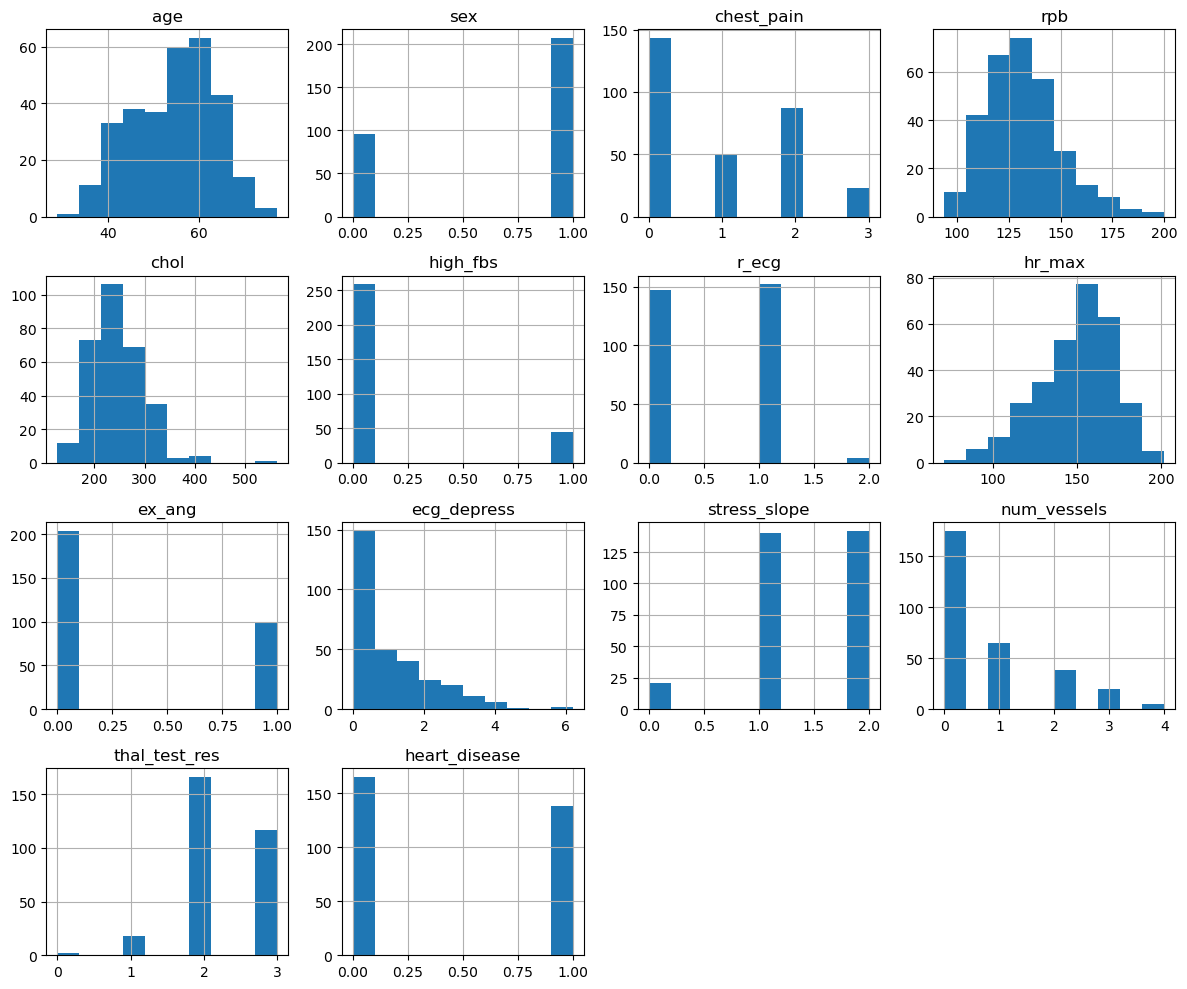

In [8]:
data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the heart_disease target, and conduct a count of the number of diseased and healthy individuals and report on the results:

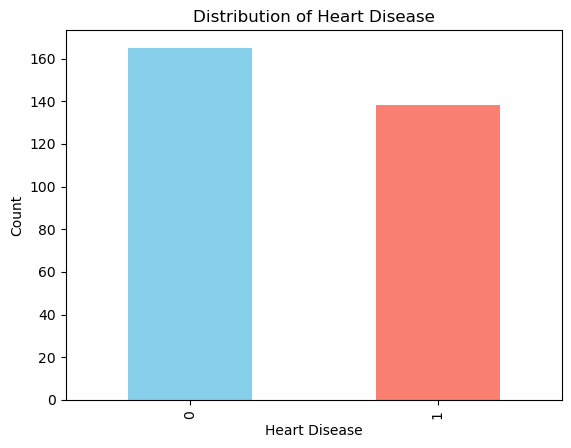

Number of healthy (heart_disease=False/0): 165
Number of diseased (heart_disease=True/1): 138
Total samples: 303


In [9]:

data['heart_disease'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

count_diseased = data['heart_disease'].sum() 
count_healthy = len(data) - count_diseased

print(f"Number of healthy (heart_disease=False/0): {count_healthy}")
print(f"Number of diseased (heart_disease=True/1): {count_diseased}")
print(f"Total samples: {len(data)}")

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

                    age       sex  chest_pain       rpb      chol  high_fbs  \
age            1.000000 -0.098447   -0.068653  0.279351  0.213678  0.121308   
sex           -0.098447  1.000000   -0.049353 -0.056769 -0.197912  0.045032   
chest_pain    -0.068653 -0.049353    1.000000  0.047608 -0.076904  0.094444   
rpb            0.279351 -0.056769    0.047608  1.000000  0.123174  0.177531   
chol           0.213678 -0.197912   -0.076904  0.123174  1.000000  0.013294   
high_fbs       0.121308  0.045032    0.094444  0.177531  0.013294  1.000000   
r_ecg         -0.116211 -0.058196    0.044421 -0.114103 -0.151040 -0.084189   
hr_max        -0.398522 -0.044020    0.295762 -0.046698 -0.009940 -0.008567   
ex_ang         0.096801  0.141664   -0.394280  0.067616  0.067023  0.025665   
ecg_depress    0.210013  0.096093   -0.149230  0.193216  0.053952  0.005747   
stress_slope  -0.168814 -0.030711    0.119717 -0.121475 -0.004038 -0.059894   
num_vessels    0.276326  0.118261   -0.181053  0.101

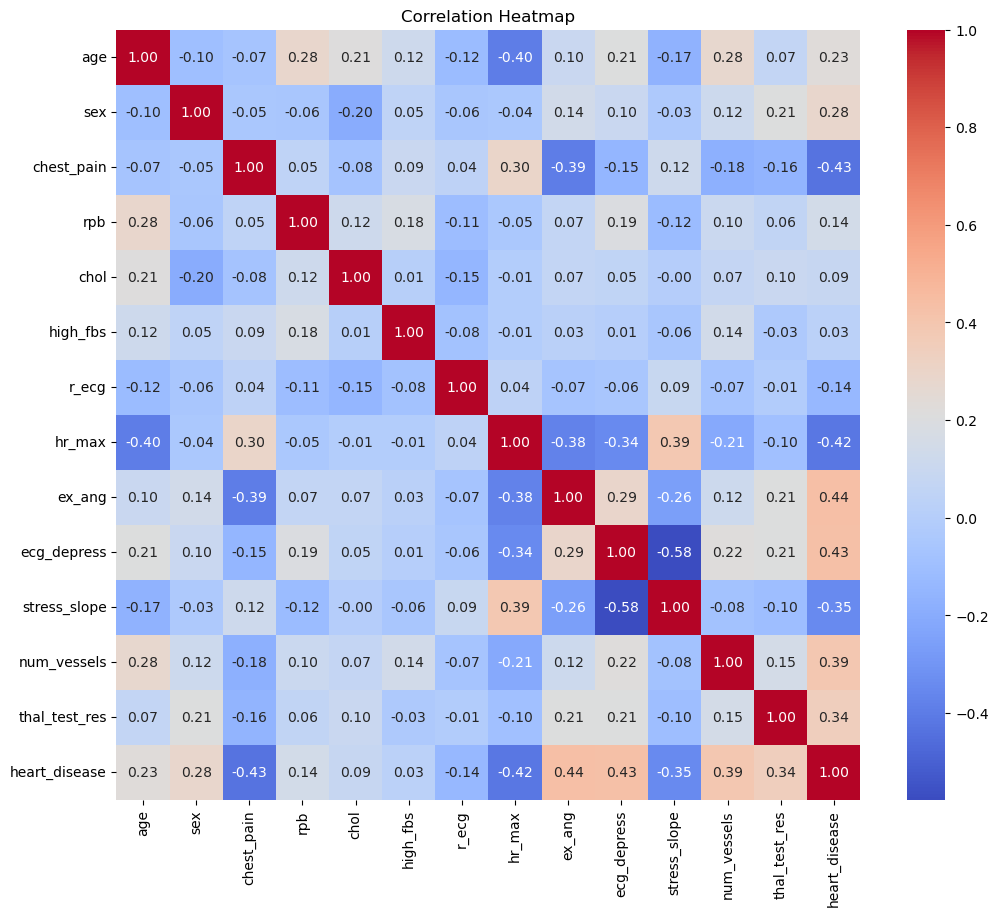

In [10]:
corr_matrix = data.corr()
print(corr_matrix)
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Positive vs. Negative Correlation

- **Positive correlation**: As the feature value increases, the likelihood (or probability) of heart disease **increases**.
- **Negative correlation**: As the feature value increases, the likelihood of heart disease **decreases**.

---

- **Exercise-induced angina (`ex_ang`): +0.44**  
    - A relatively high positive correlation, indicating that individuals who experience angina during exercise are more likely to have heart disease.
    - Exercise puts strain on the heart especially if there are arteries or blood vessels that are clogged or restricted, as the heart would require more blood flow.
- **ST depression (`ecg_depress`): +0.43**  
    - A strong positive correlation as well; higher ST depression often indicates myocardial ischemia, linked to higher likelihood of heart disease.
- **Chest pain type (`chest_pain`): –0.43**  
    - Despite the negative sign, the magnitude (~0.43) is strong. It suggests that certain chest pain categories strongly align with heart disease.
- **Maximum Heart Rate Achieved (hr_max): –0.42**
    - Lower maximum heart rate correlates with a higher likelihood of heart disease (and vice versa).
- **Number of Major Vessels (num_vessels): +0.39**
    - More vessels showing abnormality (0–4) often indicates a greater risk of heart disease.
    - Each additional vessel involved could represent more extensive coronary blockage.
- **Thalassemia Test Result (thal_test_res): +0.34**
    - Certain abnormal results in the “thal” (thallium scan or related) test correlate with a higher incidence of heart disease.
- **Stress Slope (stress_slope): –0.35**
    - A flatter or downward ST slope (depending on coding) during stress is linked to higher likelihood of heart disease. A normal heart under stress often shows an upward slope; a flat or downward pattern typically indicates compromised blood flow.
- **Correlation of stress_slope to hr_max: 0.39**
    - Shows that as the maximum heart rate increases as the slope for stress increase.
- **Correlation of chest pain to hr_max: 0.30**
    - Indicates that the higher the maxmimum heart rain the higher the probability of chest pain.
- **Correlation of age to hr_max: -0.40**
    - Indicates the correlation of age to maximum heart rate is inversely proportional, the older the person the lower the heart rate and vice versa.
- **Correlation of age to rpb: 0.28**
    - Indicates a moderate correlation of age to resting blood pressure and as the age increases so does the blood pressure.
---


## Part 2. Prepare the 'Raw' Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe.

In [11]:
y_raw = data['heart_disease']
X_raw = data.drop('heart_disease', axis=1)

print("Features shape:", X_raw.shape)
print("Target shape:", y_raw.shape)

Features shape: (303, 13)
Target shape: (303,)


### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split() method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [12]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.30, random_state=42)

In [13]:
print("X_train_raw shape:", X_train_raw.shape)
print("y_train_raw shape:", y_train_raw.shape)
print("X_test_raw shape:", X_test_raw.shape)
print("y_test_raw shape:", y_test_raw.shape)

X_train_raw shape: (212, 13)
y_train_raw shape: (212,)
X_test_raw shape: (91, 13)
y_test_raw shape: (91,)


### We'll explore how not processing your data can impact model performance by using the K-Nearest Neighbor classifier. One thing to note was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our raw data and report the results. For this initial implementation simply use the **default** settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [14]:
knn_raw = KNeighborsClassifier()  

knn_raw.fit(X_train_raw, y_train_raw)

y_pred_raw = knn_raw.predict(X_test_raw)

In [15]:
accuracy_raw = knn_raw.score(X_test_raw, y_test_raw)
print("Accuracy:", accuracy_raw)
precision_raw = metrics.precision_score(y_test_raw, y_pred_raw)
print("Precision:", precision_raw)
recall_raw = metrics.recall_score(y_test_raw, y_pred_raw)
print("Recall:", recall_raw)
f1_raw = metrics.f1_score(y_test_raw, y_pred_raw)
print("F1 Score:", f1_raw)

Accuracy: 0.6593406593406593
Precision: 0.631578947368421
Recall: 0.5853658536585366
F1 Score: 0.6075949367088608


### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler. Use the fit_transform() to fit this pipeline to your training data. and then transform() to apply that pipeline to your test data

Hint:
1. Create separate pipelines for numeric and categorical features with Pipeline() and then combining them with ColumnTransformer()
2. First, fit the full pipeline with the training data. Then, apply it to the test data as well.

### Pipeline:

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [17]:
# Create pipelines
numeric_features = X_train_raw.select_dtypes(include=['int64', 'float64']).columns

categorical_features = X_train_raw.select_dtypes(include=['object']).columns

# 1. Define the numeric pipeline (just scaling in this example)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. Define the categorical pipeline (using one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 3. Combine both pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [18]:
# Pipeline the training and test data
X_train_proc = preprocessor.fit_transform(X_train_raw)
X_test_proc = preprocessor.transform(X_test_raw)

### Now retrain your model and compare the accuracy metrics (Accuracy, Precision, Recall, F1 Score) with the raw and pipelined data.

In [19]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_proc, y_train_raw)
y_pred = knn.predict(X_test_proc)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = y_test_raw

accuracy  = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall    = recall_score(y_true, y_pred)
f1        = f1_score(y_true, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Accuracy : 0.8681318681318682
Precision: 0.8536585365853658
Recall   : 0.8536585365853658
F1 Score : 0.8536585365853658


# Results of **Scaled** vs **Raw**
- Because KNN uses distance (usually Euclidean distance) to find the “nearest” neighbors, larger-scale features can dominate the distance calculation. 
- If cholesterol (ranging ~150–400) differs by ±40, that’s a big shift in Euclidean distance, while a change of 1 or 2 in ST depression (range 0–6) might have comparatively less influence—even if ST depression is clinically very important for determining heart disease.

### Difference in Results
1. Accuracy (~66% → ~87%):
    - With the raw data, the KNN model correctly predicts ~66% of cases. After scaling, that jumps to ~87%.
    - A ~20% boost strongly suggests that unscaled numeric features were hurting KNN’s ability to measure distances properly.

2. Precision (~63% → ~85%):
    - Precision is the fraction of predicted positives that are truly positive. The model went from ~63% to ~85%.
    - Interpretation: With scaled data, the model is less likely to label someone as having heart disease if they don’t; fewer “false positives.”

3. Recall (~59% → ~85%):
    - Recall is the fraction of actual positives that the model catches. Improving from ~59% to ~85% means the model is catching far more of the individuals who truly have heart disease.
    - Interpretation: Fewer “false negatives” in the scaled scenario—important in medical screenings, where missing a diseased case can be critical.

4. F1 Score (~61% → ~85%):
    - The F1 score is the harmonic mean of precision and recall, so it captures both aspects of correct predictions. 
    - Jumping from ~61% to ~85% highlights significant gains in overall predictive power.

- Raw Data:
    - KNN might produce lower accuracy because certain features with large numeric ranges overshadow others.
    - Precision, recall, and F1 scores can also be lower, indicating it’s not capturing the nuances of all variables effectively.

- Scaled Data:
    - Higher accuracy because all features contribute more fairly to the distance metric.
    - Typically better precision and recall, leading to an improved F1 score.
    - Essentially, scaling resolves the imbalance in how feature distances are measured, allowing KNN to classify more effectively.

#### In Conclusion, scaling the data is a better way to get a better prediction as it accounts for the differences in the weight by sclaing it down to equal weights



### Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [21]:
n_values = [1, 2, 3, 5, 7, 9, 10, 20, 50]
y_true = y_test_raw
for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_proc, y_train_raw)
    y_pred = knn.predict(X_test_proc)
    
    accuracy  = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall    = recall_score(y_true, y_pred)
    f1        = f1_score(y_true, y_pred)

    print(f"K = {n}")
    print("Accuracy :", accuracy)
    print("Precision:", precision)
    print("Recall   :", recall)
    print("F1 Score :", f1)
    print()


K = 1
Accuracy : 0.7802197802197802
Precision: 0.7692307692307693
Recall   : 0.7317073170731707
F1 Score : 0.75

K = 2
Accuracy : 0.7692307692307693
Precision: 0.8333333333333334
Recall   : 0.6097560975609756
F1 Score : 0.704225352112676

K = 3
Accuracy : 0.8351648351648352
Precision: 0.7954545454545454
Recall   : 0.8536585365853658
F1 Score : 0.8235294117647058

K = 5
Accuracy : 0.8681318681318682
Precision: 0.8536585365853658
Recall   : 0.8536585365853658
F1 Score : 0.8536585365853658

K = 7
Accuracy : 0.8681318681318682
Precision: 0.8536585365853658
Recall   : 0.8536585365853658
F1 Score : 0.8536585365853658

K = 9
Accuracy : 0.8351648351648352
Precision: 0.825
Recall   : 0.8048780487804879
F1 Score : 0.8148148148148148

K = 10
Accuracy : 0.8351648351648352
Precision: 0.8611111111111112
Recall   : 0.7560975609756098
F1 Score : 0.8051948051948052

K = 20
Accuracy : 0.8461538461538461
Precision: 0.8648648648648649
Recall   : 0.7804878048780488
F1 Score : 0.8205128205128205

K = 50
Acc

## Part 3. Additional Learning Methods

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods

### Logistic Regression

Let's now try another classifier,one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model.

### Report metrics for:
1.   Accuracy
2.   Precision
3.   Recall
4.   F1 Score



In [22]:
# Logistic Regression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_proc, y_train_raw)
y_pred = logreg.predict(X_test_proc)

accuracy  = accuracy_score(y_test_raw, y_pred)
precision = precision_score(y_test_raw, y_pred)
recall    = recall_score(y_test_raw, y_pred)
f1        = f1_score(y_test_raw, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"F1 Score : {f1}")

Accuracy : 0.8131868131868132
Precision: 0.8
Recall   : 0.7804878048780488
F1 Score : 0.7901234567901234


### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

### 1. Accuracy
- Accuracy is the proportion of all instances that were correctly classified.
- Accuracy can be misleading especially if the dataset is imbalanced (one classification has a much larger number of data points compared to the other).
- As an example, if 90% of the patients are healthy and 10% diseased would confidently predict with a 90% accuracy but is clinically worthless.

### 2. Precision
- Is defined as out of all that were predicted positive which were truly positive?
- Reflects on how confident we can be in a model's positive predictions.
- If prediction is low, this means that a lot of false positives predicted.
- Scenarios where precision would be more valued:
    - From lecture, spam detection is something this would be important in as we would not want to classify important emails as spam (false positives). 
    - A higher precision means less important emails are thrown into the spam folder.

### 3. Recall
- Is defined as out of all the truly positive instances, what percentage was the model able to correctly identify?
- Reflects how good the model is in capturing all the truly positives.
- Scenarios where recall would be more valued:
    - Medical screening, a high recall would ensures that a person who is diseased will be captured by the model and correctly identified as opposed to missing them and potentially causing more harm. 

### 4. F1-Score
- The harmonic mean of both precision and recall
- Balances both precision and recall into a single value
- A high F1-Score means a good balance in both recall and precision 
- F1-Score is helpful especially in datasets that are imbalanced where we need to consider both the false positives and the false negatives.

### Let's tweak a few settings. First let's set your solver to 'sag' (Stochastic Average Gradient), your max_iter= 10, and set penalty = None and rerun your model. Let's see how your results change!

In [23]:
logreg_sag = LogisticRegression(
    solver='sag',
    max_iter=10,
    penalty=None,
    random_state=42
)

logreg_sag.fit(X_train_proc, y_train_raw)

y_pred_sag = logreg_sag.predict(X_test_proc)

accuracy  = accuracy_score(y_test_raw, y_pred_sag)
precision = precision_score(y_test_raw, y_pred_sag)
recall    = recall_score(y_test_raw, y_pred_sag)
f1        = f1_score(y_test_raw, y_pred_sag)

print(f"Accuracy : {accuracy}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"F1 Score : {f1}")


Accuracy : 0.8131868131868132
Precision: 0.8
Recall   : 0.7804878048780488
F1 Score : 0.7901234567901234


c:\Users\ckimo\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [24]:
logreg_sag = LogisticRegression(
    solver='sag',
    max_iter=1000,
    penalty=None,
    random_state=42
)

logreg_sag.fit(X_train_proc, y_train_raw)

y_pred_sag = logreg_sag.predict(X_test_proc)

accuracy  = accuracy_score(y_test_raw, y_pred_sag)
precision = precision_score(y_test_raw, y_pred_sag)
recall    = recall_score(y_test_raw, y_pred_sag)
f1        = f1_score(y_test_raw, y_pred_sag)

print(f"Accuracy : {accuracy}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"F1 Score : {f1}")


Accuracy : 0.8021978021978022
Precision: 0.7804878048780488
Recall   : 0.7804878048780488
F1 Score : 0.7804878048780488


### Explain what you changed, and why do you think that may have altered the outcome.

I had changed the max iterations from 10 to 1000, this had altered the outcome as with a max iteration of 10 did not allow the regression model to converge. Changing it to 1000 max iterations allowed the model to converge and got the most optimal possible coefficients with the data points. 

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

In [25]:
logreg_sag = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    penalty='l1',
    random_state=42
)

logreg_sag.fit(X_train_proc, y_train_raw)

y_pred_sag = logreg_sag.predict(X_test_proc)

accuracy  = accuracy_score(y_test_raw, y_pred_sag)
precision = precision_score(y_test_raw, y_pred_sag)
recall    = recall_score(y_test_raw, y_pred_sag)
f1        = f1_score(y_test_raw, y_pred_sag)

print(f"Accuracy : {accuracy}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"F1 Score : {f1}")


Accuracy : 0.8241758241758241
Precision: 0.8048780487804879
Recall   : 0.8048780487804879
F1 Score : 0.8048780487804879


### Explain what the two solver approaches are, and why liblinear may have produced an improved outcome (but not always, and it's ok if your results show otherwise!).

- The liblinear solver produced an improved outcome could be due to our dataset, since this dataset is pretty small it is more effient and more stable than using SAG. liblinear solver also supports l1 regularization and compliments it. 
- l1 regularization encourages sparcer coeeficients meaning it brings some coeficients to 0 and regularizing the model, removing unneeded or not necessary features.

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

More explanation here: https://en.wikipedia.org/wiki/Support_vector_machine.

For the sake of this project, you can regard it as a type of classifier. 

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [26]:
svm_model = SVC(probability=True, random_state=42)

svm_model.fit(X_train_proc, y_train_raw)

y_pred_svm = svm_model.predict(X_test_proc)


### Report the accuracy, precision, recall, F1 Score, of your model, but in addition, plot a Confusion Matrix of your model's performance

recommend using `from sklearn.metrics import ConfusionMatrixDisplay` for this one!


In [27]:
# Report Metrics
accuracy  = accuracy_score(y_test_raw, y_pred_svm)
precision = precision_score(y_test_raw, y_pred_svm)
recall    = recall_score(y_test_raw, y_pred_svm)
f1        = f1_score(y_test_raw, y_pred_svm)

print(f"Accuracy : {accuracy}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"F1 Score : {f1}")

Accuracy : 0.8241758241758241
Precision: 0.8048780487804879
Recall   : 0.8048780487804879
F1 Score : 0.8048780487804879


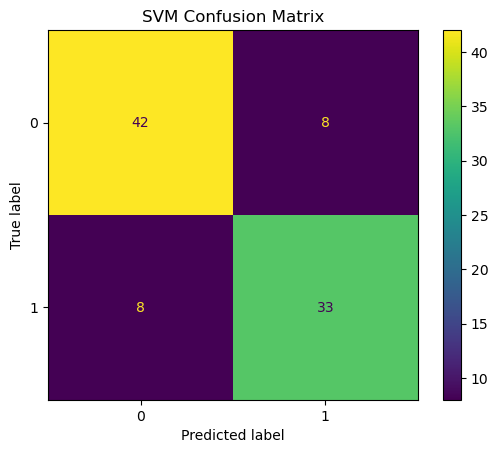

In [28]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_proc, y_test_raw)
plt.title("SVM Confusion Matrix")
plt.show()

### Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

recommend using the `metrics.roc_curve` `metrics.auc` and `metrics.RocCurveDisplay` for this one!

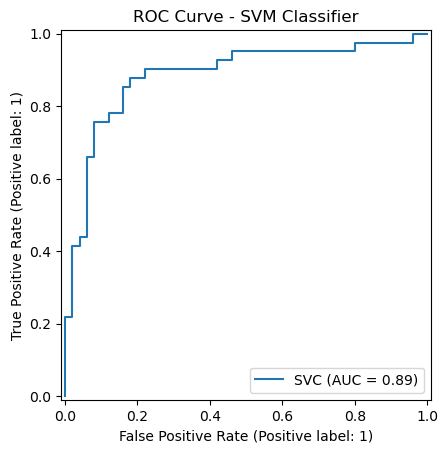

In [29]:
# ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(svm_model, X_test_proc, y_test_raw)
plt.title("ROC Curve - SVM Classifier")
plt.show()


[Describe what an ROC Curve is and what the results mean here] The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test, so the areas under ROC curves are used to compare the usefulness of tests. Here we see a relatively low area under the curve indicating a poorly performing model.

An AUC of 0.0.89 suggests that the area under the ROC curve is 0.0.89, implying that the model is performing better than random guessing (closer to 1 the better) and thus has good discriminative ability.

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [30]:
# Metrics
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_proc, y_train_raw)
y_pred_linear = svm_linear.predict(X_test_proc)
accuracy  = accuracy_score(y_test_raw, y_pred_linear)
precision = precision_score(y_test_raw, y_pred_linear)
recall    = recall_score(y_test_raw, y_pred_linear)
f1        = f1_score(y_test_raw, y_pred_linear)

print(f"Accuracy : {accuracy}")
print(f"Precision: {precision}")
print(f"Recall   : {recall}")
print(f"F1 Score : {f1}")

Accuracy : 0.8131868131868132
Precision: 0.8
Recall   : 0.7804878048780488
F1 Score : 0.7901234567901234


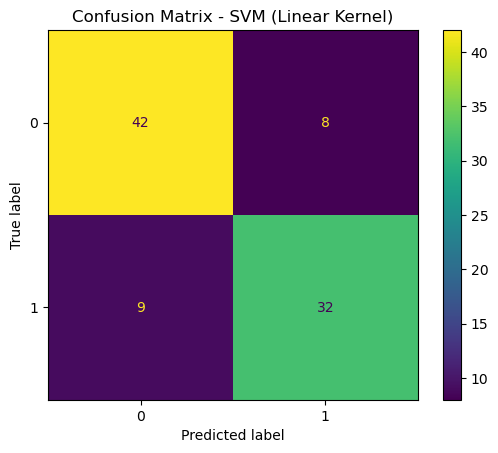

In [39]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_linear, X_test_proc, y_test_raw)
plt.title("Confusion Matrix - SVM (Linear Kernel)")
plt.show()

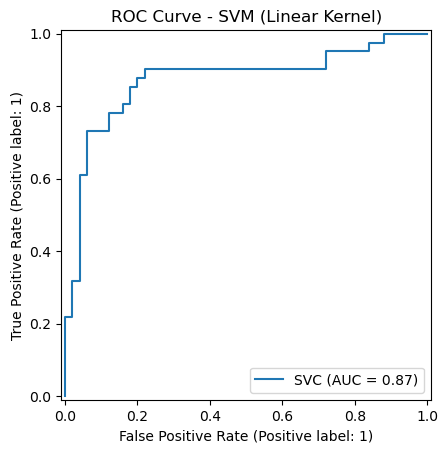

In [40]:
# ROC
RocCurveDisplay.from_estimator(svm_linear, X_test_proc, y_test_raw)
plt.title("ROC Curve - SVM (Linear Kernel)")
plt.show()

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

By switching from the default SVM kernel to a linear kernel, I basically asked the SVM to find a simpler, straight-line boundary instead of a more flexible, curved one. That can change my model’s performance a lot, because if my data is nearly linear, this simpler kernel might actually do better—it's faster to train and doesn’t need as much parameter tuning. But if my data needs a more complex boundary, a linear kernel might underfit and give worse results. Essentially, this parameter tweak shifts how the SVM decides where one class stops and the other class starts; if my features lend themselves to a straight hyperplane boundary, performance may go up, but if they’re more complicated, it can drop. The differences in accuracy, recall, or precision I’m seeing basically tell me how well the linear assumption matches the real structure of my data. And from what can be seen, the values of all the metrics had reduced by a slight bit.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Logistic regression is about modeling probabilities and minimizing logistic loss, while a linear SVM is about maximizing the margin between two classes and minimizing hinge loss. These distinct objectives lead to slightly different decision boundaries, especially in regions where the data may not be perfectly separable.

### Decision Trees

Create both a Decision Tree and a KNN and fit them onto your fully preprocessed data, then calculate an accuracy score for both (https://scikit-learn.org/stable/api/sklearn.tree.html).

### What are Decision Trees? 

Decision Trees are a non-parametric supervised learning methods used for classification and regression. The goal is to split data into branches based on feature conditions, forming a tree-like structure where each internal node represents a decision, and each branch represents an outcome.

Compared to KNN, decision trees is less influenced by the high dimensionality of the data, and can make the model output more predicable. 

For more explanation, see here: https://en.wikipedia.org/wiki/Decision_tree. For the sake of this project, you can regard it as a type of classifier. 

In [41]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree 
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_proc, y_train_raw)
dt_preds = dt_model.predict(X_test_proc)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_proc, y_train_raw)
knn_preds = knn_model.predict(X_test_proc)

In [42]:
# Decision Tree Accuracy 
dt_accuracy = accuracy_score(y_test_raw, dt_preds)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# KNN Accuracy
knn_accuracy = accuracy_score(y_test_raw, knn_preds)
print(f"KNN Accuracy:          {knn_accuracy}")


Decision Tree Accuracy: 0.7362637362637363
KNN Accuracy:          0.8681318681318682


#### Categorical Preprocessing Only

Create a new preprocessing pipeline which ONLY preprocesses categorical values (leaving scalar variables in the data as they were originally, ie. no StandardScaler).   
Process your data with this new pipeline, fit a decision tree and a KNN once more and report a new accuracy score for each.   

Hint: Ensure that remainder = 'passthrough' in your ColumnTransformer to ensure scalar values are not dropped!    

In [44]:
# Categorical Preprocessing Only
categorical_features = [
    'sex',
    'chest_pain',
    'high_fbs',
    'r_ecg',
    'ex_ang',
    'stress_slope',
    'thal_test_res'
]

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_cat_only = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, categorical_features)
    ],
    remainder='passthrough'  # numeric columns remain untouched
)

X_train_cat_only = preprocessor_cat_only.fit_transform(X_train_raw)
X_test_cat_only = preprocessor_cat_only.transform(X_test_raw)


In [45]:
# Fit Decision Tree 
dt_cat_only = DecisionTreeClassifier(random_state=42)
dt_cat_only.fit(X_train_cat_only, y_train_raw)

# Fit KNN
knn_cat_only = KNeighborsClassifier()
knn_cat_only.fit(X_train_cat_only, y_train_raw)


KNeighborsClassifier()

In [46]:
# Decision Tree Accuracy 
y_pred_dt = dt_cat_only.predict(X_test_cat_only)
dt_accuracy = accuracy_score(y_test_raw, y_pred_dt)
print(f"Decision Tree accuracy (Cat-Only Preprocessing): {dt_accuracy}")

# KNN Accuracy 
y_pred_knn = knn_cat_only.predict(X_test_cat_only)
knn_accuracy = accuracy_score(y_test_raw, y_pred_knn)
print(f"KNN accuracy (Cat-Only Preprocessing):          {knn_accuracy}")


Decision Tree accuracy (Cat-Only Preprocessing): 0.7582417582417582
KNN accuracy (Cat-Only Preprocessing):          0.6593406593406593


#### Explain the difference in accuracy loss in Decision Trees vs KNNs when Standardization was removed. 

The biggest difference in accuracy loss that I observed was primarily due to the lack of standardization. Without standardization, features with extreme values or larger ranges tend to dominate the distance calculations (in the case of KNN) or skew the decision boundaries. This imbalance means that some features disproportionately influence the model’s predictions, leading to a less optimal fit. Standardizing the data scales each feature to a similar range, ensuring that no single feature can overpower the others in the prediction process. In short, standardization is crucial for obtaining a balanced, well-performing model because it prevents extreme values from skewing the best fit line or decision boundary.

# Printing Jupyter notebook to PDF (Google Colab Only, Optional)

It may take a few minutes to run

In [38]:
def colab2pdf():
  ENABLE=True # @param {type:"boolean"}
  if ENABLE:
    !apt-get install librsvg2-bin
    import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
    NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
    TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
    NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
    warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
    with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
  if not pathlib.Path("/usr/local/bin/quarto").exists():
    !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
    with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
    !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
    google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


ModuleNotFoundError: No module named 'werkzeug'